# StarDist Nucleus Segmentation

by [Qin Yu](https://github.com/qin-yu), Apr 2022

Skip the first code block if there is only one graphics card installed; otherwise, select the desired graphics card by setting `CUDA_VISIBLE_DEVICES`:

In [1]:
# Restrict Jupyter notebook to a single graphics card:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="7"

# Verify visible devices:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [2]:
import h5py
from stardist.models import StarDist2D
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt


### Load Image

In [3]:
path_image_input = "/g/kreshuk/yu/Datasets/CPape2020COVID/train/gt_image_007.h5"
with h5py.File(path_image_input, 'r') as f_in:
    raw_nuclei = f_in['raw/nuclei'][:]

### Load Model

In [4]:
# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


### Prediction

In [5]:
labels, _ = model.predict_instances(normalize(raw_nuclei))

### Visualisation

Text(0.5, 1.0, 'prediction')

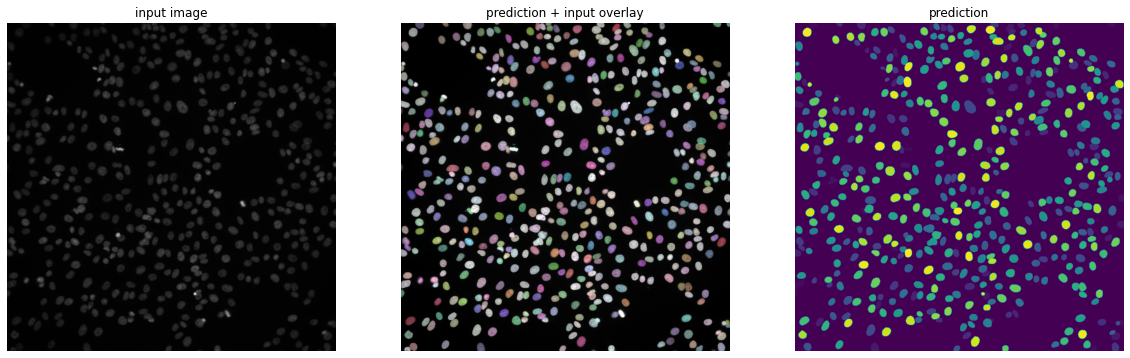

In [6]:
plt.figure(figsize=(20, 15))

plt.subplot(1,3,1)
plt.imshow(raw_nuclei, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,3,2)
plt.imshow(render_label(labels, img=raw_nuclei))
plt.axis("off")
plt.title("prediction + input overlay")

plt.subplot(1,3,3)
plt.imshow(labels)
plt.axis("off")
plt.title("prediction")